# Deep learning (Do it yourself) - Jugendforum Informatik
---

Now it is time to put together all you have learned. Here we will guide you to create a neural network able to classify a small subset of the QuickDraw dataset.

In [36]:
import torch
from torchvision import transforms
from utils import datasets as my_datasets

In [37]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = my_datasets.MiniQuickDraw(root='./data', train=True, transform=transform)
testset = my_datasets.MiniQuickDraw(root='./data', train=False, transform=transform)

Write the train and test loader for the train and test dataset

In [38]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                          shuffle=True, num_workers=2)

Create a neural network with 2 hidden layers 784 -> 100 -> 100 -> 10

In [39]:
import torch.nn as nn
import torch.nn.functional as F

In [52]:
class Net(nn.Module):
    def __init__(self):
        self.input_size = 28*28
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(self.input_size, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [61]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
nb_epochs = 20

In [63]:
import numpy as np
loss_epochs = np.empty(nb_epochs)

In [57]:
def training(nb_epochs, net):
    for epoch in range(nb_epochs):  # loop over the dataset multiple times

        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

        average_loss = running_loss / len(trainloader)
        loss_epochs[epoch] = average_loss

        print(f'Epoch: {epoch} ===> Loss: {average_loss}')


In [58]:
training(nb_epochs, net)
print('Finished Training')

Epoch: 0 ===> Loss: 2.224775017897288
Epoch: 1 ===> Loss: 1.7997978208462397
Epoch: 2 ===> Loss: 1.3407568566004435
Epoch: 3 ===> Loss: 1.144146293103695
Epoch: 4 ===> Loss: 1.0481383792559307
Epoch: 5 ===> Loss: 0.9896007366975148
Epoch: 6 ===> Loss: 0.9467614725232124
Epoch: 7 ===> Loss: 0.9139686970909436
Epoch: 8 ===> Loss: 0.8848237121105194
Epoch: 9 ===> Loss: 0.8589340922236443
Epoch: 10 ===> Loss: 0.8366215527057648
Epoch: 11 ===> Loss: 0.8154322628180186
Epoch: 12 ===> Loss: 0.7963179130355517
Epoch: 13 ===> Loss: 0.7787751578787963
Epoch: 14 ===> Loss: 0.7622341672082742
Epoch: 15 ===> Loss: 0.747209358115991
Epoch: 16 ===> Loss: 0.7328102625409763
Epoch: 17 ===> Loss: 0.7199183895687262
Epoch: 18 ===> Loss: 0.7071818616986275
Epoch: 19 ===> Loss: 0.6952954239149889
Finished Training


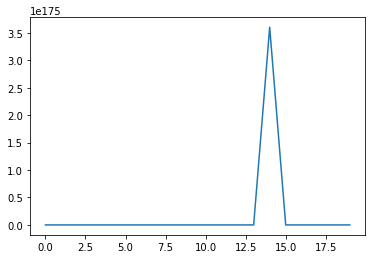

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(loss_epochs)

In [66]:
running_loss = 0
for i, data in enumerate(testloader):
    
    inputs, labels = data
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    
average_loss = running_loss / len(testloader)
print(f'Test loss: {average_loss}')

Test loss: 0.7254614466428757


In [67]:
from utils.plotting import show

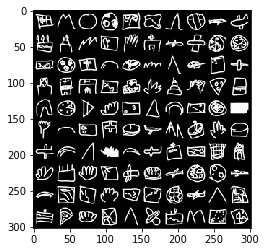

In [68]:
from torchvision.utils import make_grid

dataiter = iter(testloader)
images, labels = dataiter.next()

img = images.view((-1, 1, 28, 28))
grid = make_grid(img, nrow=10)

# print images
show(grid)

In [69]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
predicted.view(10,10)

tensor([[7, 5, 0, 0, 3, 1, 5, 0, 4, 4],
        [3, 5, 5, 1, 8, 6, 4, 0, 0, 0],
        [1, 0, 6, 2, 7, 5, 5, 4, 3, 4],
        [6, 3, 6, 1, 9, 2, 9, 8, 7, 3],
        [9, 0, 4, 1, 1, 5, 2, 1, 7, 3],
        [7, 2, 1, 6, 6, 4, 5, 7, 8, 1],
        [4, 2, 5, 3, 2, 4, 6, 1, 3, 9],
        [1, 9, 8, 3, 0, 9, 4, 7, 0, 4],
        [2, 3, 1, 8, 1, 1, 0, 4, 5, 3],
        [9, 7, 8, 1, 5, 3, 6, 5, 1, 0]])

You can see what the lable mean with 

In [70]:
my_datasets.MiniQuickDraw.meaning_labels

{0: 'soccer ball',
 1: 'map',
 2: 'rainbow',
 3: 'calendar',
 4: 'airplane',
 5: 'mountain',
 6: 'hospital',
 7: 'pizza',
 8: 'hand',
 9: 'cake'}